# Bokeh Interactive
With this notebook I want to introduce you the possibilities of Jupyter, IPywidgets and Bokeh. I think these tools in combination with <a href='https://www.docker.com/'>Docker</a>, <a href='https://github.com/jupyter-incubator/dashboards'>Jupyter Dashboards</a> and <a href='https://github.com/jupyterlab/jupyterlab'>JupyterLab</a> makes it very easy to create interactive processing and visualizing applications. At the moment (end 2016) some of these libraries are not very stable and might have frequent changes, especially JupyterLab and Jupyter Dashboards. But everything I have seen so far, has convinced me to put some of my own time into these tools. 

First we load an image from skimage and convert the rgb values to gray scale. That is the 2D array, we want to visualize.

In [1]:
from skimage import color, data

astro = color.rgb2gray(data.astronaut())[::-1, :]

Bokeh makes plotting 2D arrays very simple. We plot the array with the image function. Bokeh has several color mapper. It depends on the scale of the data, which one to choose. We take the LinearColorMapper with a Viridis palette. Viridis is a palette developed by the Matplotlib team. It has several advantages, like
* it is perceptual uniform,
* gray printing is possible,
* and colorblind people can still use it.

At the right site we create a nice looking color bar. You can interactively zoom, adjust the position, reset and save Bokeh plots.

In [2]:
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

fig = figure(x_range=(0, 10), y_range=(0, 10), toolbar_location='above')

color_mapper = LinearColorMapper(palette='Viridis256', low=0, high=1)
image_renderer = fig.image(image=[astro], x=0, y=0, dw=10, dh=10, color_mapper=color_mapper)

color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, location=(0,0))

fig.add_layout(color_bar, 'right')
handle = show(fig, notebook_handle=True)

Loading BokehJS ...

Now we want to bring some more interactivity to the program with ipwidgets. We define a function, which shall be called when a button is pressed. The function simply rotates the image by 90 degree and updates the notebook with the push_notebook function.

In [3]:
from bokeh.io import push_notebook
from skimage.transform import rotate

def on_button_clicked(button):
    astro[:] = rotate(astro, 90)
    image_renderer.data_source.data['image'] = [astro]

    push_notebook(handle=handle)

Ipywidgets gives us many various widgets. <a href='http://nbviewer.jupyter.org/github/ipython/ipywidgets/blob/master/docs/source/examples/Widget%20List.ipynb'>Here</a> you can find a list of all available ipywidgets. We create a simple button, that calls our previously defined function, when the button is clicked. Unfortunatelly the nbviewer creates only a static HTML file of this notebook. Therefor the button is not clickable. If you want to see the whole notebook in action you should try it out at you own machine.

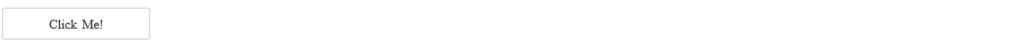

In [4]:
import ipywidgets as widgets
from IPython.display import display

button = widgets.Button(description="Click Me!")
button.on_click(on_button_clicked)

display(button)